# Unit 5 - Financial Planning


In [32]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [33]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [91]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [92]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [93]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $87071.03
The current value of your 5.3 ETH is $11863.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [102]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [103]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [104]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Preview DataFrame
df_closing_prices

,AGG,SPY
2021-03-16,113.87,395.94


In [105]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices['AGG'][0]
spy_close_price = df_closing_prices['SPY'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.87
Current SPY closing price: $395.94


In [106]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19797.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [107]:
# Set monthly household income
monthly_income = 12000

# Set the amount data
amount_data = {
    "amount": [my_btc_value + my_eth_value, 
               my_spy_value + my_agg_value]
}

# Set the index data
index_data = ["crypto", "shares"]

# Create the savings dataframe
df_savings = pd.DataFrame(amount_data, index=index_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,98934.267125
shares,42571.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

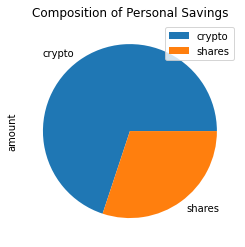

In [108]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings") 

In [131]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(df_savings.sum()['amount'])

# Validate saving health
if total_savings >= emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else:
    print(f'Not enough money in the emergency fund. You need ${emergency_fund - total_savings} to reach your goal.') 

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [173]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-03-16', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()

start_date2 = pd.Timestamp('2019-01-02', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-03-15', tz='America/New_York').isoformat()

In [179]:
# Get 5 years' worth of historical data for SPY and AGG

##Max limit of 1000 so we get two sets of date range data and concatenate.
df_stock_data1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit=1000
).df

df_stock_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit=1000
).df

df_stock_data = df_stock_data1.append(df_stock_data2)

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2016-03-16 00:00:00-04:00  109.39  109.86  109.2863  109.850  1695716  201.60   
2016-03-17 00:00:00-04:00  109.95  110.13  109.9000  110.065  3932816  203.24   
2016-03-18 00:00:00-04:00  110.19  110.29  110.1201  110.165  1746607  204.17   
2016-03-21 00:00:00-04:00  110.06  110.13  109.9100  109.920  1999255  204.07   
2016-03-22 00:00:00-04:00  110.27  110.27  109.8300  109.860  1709871  203.76   

                                                             
                             high     low   close    volume  
time                                                         
2016-03-16 00:00:00-04:00  203.82  201.55  203.40  98947700  
2016-03-17 00:00:00-04:00  205.23  202.77  204.65  89066302  
2016-03-18 00:00:00-04:00  204.78  203.80  204.44  94916251  
2016-03-21 00:00:00-04:00  204.94  203.80  204.68  55119916  
2016-03-22 00:00:00-04:00  205.23  203.57  204.59  71913432

In [181]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [182]:
# Printing the simulation input data
MC_Thirty.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2016-03-16 00:00:00-04:00  109.39  109.86  109.2863  109.850  1695716   
2016-03-17 00:00:00-04:00  109.95  110.13  109.9000  110.065  3932816   
2016-03-18 00:00:00-04:00  110.19  110.29  110.1201  110.165  1746607   
2016-03-21 00:00:00-04:00  110.06  110.13  109.9100  109.920  1999255   
2016-03-22 00:00:00-04:00  110.27  110.27  109.8300  109.860  1709871   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-03-16 00:00:00-04:00          NaN  201.60  203.82  201.55  203.40   
2016-03-17 00:00:00-04:00     0.001957  203.24  205.23  202.77  204.65   
2016-03-18 00:00:00-04:00     0.000909  204.17  204.78  203.80  204.44   
2016-03-21 00:00:00-04:00    -0.002224  204.07  204.94  203.80  204.68   
2016-03-22 00:00:00-04:00    -0.000546  203.76  205.23  203.57  204.59   

                                                  
                             volume daily_return  
time                                              
2016-03-16 00:00:00-04:00  98947700          NaN  
2016-03-17 00:00:00-04:00  89066302     0.006146  
2016-03-18 00:00:00-04:00  94916251    -0.001026  
2016-03-21 00:00:00-04:00  55119916     0.001174  
2016-03-22 00:00:00-04:00  71913432    -0.000440

In [183]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013024,1.005683,0.995678,1.002497,1.014093,1.004833,0.999323,0.987963,0.998762,0.996720,...,0.999590,1.004095,0.999977,1.016895,1.006360,1.000132,1.011505,1.016567,1.012497,0.985052
2,1.009296,0.999718,0.990340,1.003994,1.012954,1.004020,1.002541,0.983914,1.004631,0.996902,...,1.003026,1.007376,1.004765,1.028715,1.013035,1.005991,1.021461,1.013371,1.019909,0.982309
3,0.993817,1.019094,0.996497,1.003583,1.006024,1.013794,1.018817,0.987103,0.994113,0.999205,...,1.016633,1.013105,0.999402,1.039435,1.008986,1.008112,1.020853,1.012804,1.026303,0.983241
4,0.986153,1.021733,0.988636,1.007199,1.010234,1.029884,1.013494,0.988658,0.992760,0.997911,...,1.011410,1.019919,1.002857,1.034073,1.017259,1.004886,1.022772,1.019273,1.019742,0.985447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.085528,4.188641,29.501840,40.976538,10.968739,21.370706,18.935244,23.101046,12.579587,21.238662,...,14.199053,20.676838,11.750441,13.081452,18.857330,5.430926,19.352503,32.071000,33.586673,9.608694
7557,21.903299,4.275146,29.585426,41.202713,10.949934,21.506844,19.194540,23.148932,12.501783,21.216804,...,14.258416,20.790522,11.834384,13.052877,18.953982,5.417919,19.288767,31.989501,33.801019,9.439467
7558,21.697704,4.298957,29.348947,40.944751,10.927330,21.670033,19.165212,22.948073,12.563140,21.392139,...,14.277467,20.769221,11.665986,13.144422,19.049789,5.420083,19.321719,32.000006,33.861506,9.396543
7559,21.670626,4.309405,29.225169,41.108823,10.922439,21.770926,19.020988,23.243566,12.581479,21.431584,...,14.154073,20.897802,11.672104,13.218211,19.038456,5.470809,19.367801,32.381693,33.888141,9.341431


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

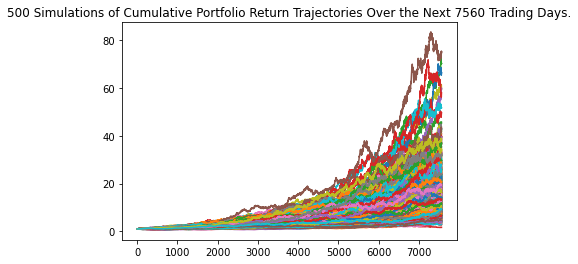

In [184]:
# Plot simulation outcomes
MC_Thirty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

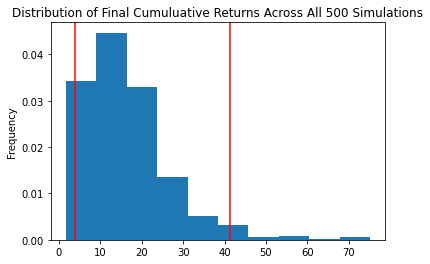

In [185]:
# Plot probability distribution and confidence intervals
MC_Thirty.plot_distribution()

### Retirement Analysis

In [186]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_Thirty.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             16.338893
std              10.347627
min               1.674059
25%               8.992673
50%              14.545159
75%              20.974288
max              75.126077
95% CI Lower      3.938222
95% CI Upper     41.382030
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [187]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $78764.44 and $827640.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [188]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $118146.66 and $1241460.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [189]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Weights: 10% Bonds, 90% Stocks
MC_Five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [190]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995758,1.003266,1.001500,1.002137,1.000303,0.983684,1.010493,0.995736,1.004513,1.003896,...,1.011440,0.989879,0.993867,0.995575,1.009186,1.006990,0.985476,0.968700,0.988214,1.011082
2,1.006575,1.011184,1.001627,1.012938,0.966657,0.989472,1.014625,0.983824,1.009424,0.999243,...,0.997835,0.988530,0.988624,1.017271,1.014715,1.009853,0.982269,0.965951,0.981597,1.013049
3,1.027089,1.021359,1.007106,1.008479,0.963279,0.981359,1.027105,0.997938,0.988562,0.999855,...,1.003350,1.005495,0.990657,1.001253,0.999638,1.018254,0.993697,0.954147,0.964037,0.997246
4,1.007340,1.033127,1.005564,1.012546,0.966418,0.978483,1.033171,1.003432,0.986881,1.003118,...,1.000675,1.006651,0.979250,1.000553,1.002175,1.010327,0.978448,0.965531,0.962393,0.974692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.788869,1.832693,1.614121,1.955244,1.082214,1.936001,1.327785,1.575850,2.714747,3.732241,...,4.529305,2.037393,1.855852,2.513728,2.317112,1.510722,0.783593,3.544535,1.377435,1.267172
1257,1.791687,1.834001,1.561359,1.954583,1.104104,1.930752,1.325740,1.553295,2.709724,3.728301,...,4.524240,2.027470,1.823310,2.568772,2.369366,1.485782,0.781485,3.553556,1.379121,1.253782
1258,1.778845,1.819464,1.549279,1.919985,1.114490,1.935401,1.331718,1.545763,2.686543,3.772742,...,4.553896,2.063111,1.819009,2.548442,2.398320,1.479142,0.788544,3.607733,1.386603,1.260835
1259,1.789440,1.864680,1.545886,1.923848,1.137881,1.943392,1.318065,1.522062,2.695765,3.767119,...,4.590219,2.071503,1.809904,2.576870,2.371825,1.501202,0.788517,3.570132,1.389124,1.267431


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

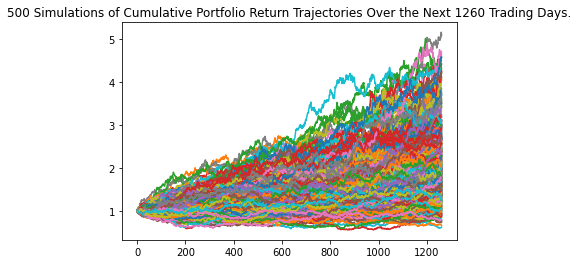

In [192]:
# Plot simulation outcomes
MC_Five.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

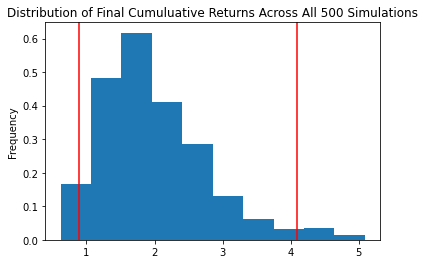

In [193]:
# Plot probability distribution and confidence intervals
MC_Five.plot_distribution()

In [194]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_five = MC_Five.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_five)

count           500.000000
mean              1.997860
std               0.768536
min               0.618571
25%               1.445546
50%               1.860862
75%               2.407886
max               5.088217
95% CI Lower      0.891659
95% CI Upper      4.089943
Name: 1260, dtype: float64


In [202]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_five[8]*initial_investment,2)
ci_upper_five = round(summary_stats_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53499.54 and $245396.56


### Ten Years Retirement Option

In [197]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Weights: 25% Bonds, 75% Stocks
MC_Ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [198]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009380,0.993638,1.005187,1.005706,0.995975,1.001503,0.985701,0.997957,0.991041,1.017194,...,1.006294,1.007094,0.997703,0.988209,0.993698,1.009174,0.993620,0.996350,1.005912,1.011691
2,1.009998,0.978456,1.002146,0.983038,0.990581,1.010704,1.007762,1.004518,0.983994,1.012584,...,0.988840,1.005530,0.991683,0.974784,1.003064,1.003727,0.990405,0.996519,1.009655,1.023032
3,1.012871,0.992550,0.994918,0.987569,1.003056,1.006490,1.015069,0.993734,0.965912,1.019950,...,0.997077,0.989026,0.968589,0.988196,0.996773,0.993735,0.987222,1.008994,1.014194,1.023266
4,1.038030,0.989803,0.980458,0.975676,1.009830,1.032974,1.018335,0.993805,0.959146,1.022493,...,1.013505,0.972907,0.983963,0.999604,0.984447,0.992282,0.979067,1.017012,1.014898,1.028815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.411360,3.336876,1.875700,2.378488,1.403982,3.036968,1.320241,7.263243,2.281820,4.582643,...,2.619744,3.532368,2.249158,1.182035,4.107896,2.007197,3.076474,6.410013,1.948499,7.038815
2517,3.420153,3.384301,1.891159,2.310332,1.418184,3.010762,1.319999,7.258612,2.298750,4.572636,...,2.612530,3.525120,2.240585,1.162846,4.059147,2.018759,3.077317,6.504726,1.928825,7.046546
2518,3.436169,3.371416,1.913864,2.360226,1.403706,2.975453,1.322186,7.232681,2.335011,4.633065,...,2.635977,3.525699,2.236788,1.129472,4.032315,2.032400,3.059981,6.425858,1.901791,7.081750
2519,3.468751,3.406098,1.905489,2.387921,1.394485,2.981814,1.318227,7.257254,2.346244,4.643724,...,2.628456,3.517775,2.219660,1.131872,3.963000,2.028960,3.042971,6.359177,1.898436,7.093882


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

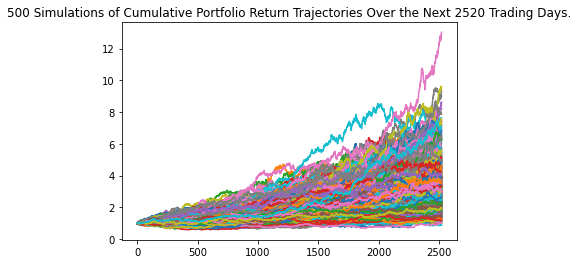

In [199]:
# Plot simulation outcomes
MC_Ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

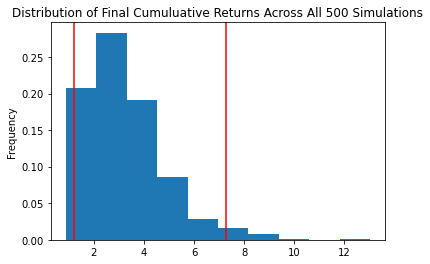

In [200]:
# Plot probability distribution and confidence intervals
MC_Ten.plot_distribution()

In [201]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_ten = MC_Ten.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_ten)

count           500.000000
mean              3.222009
std               1.598920
min               0.877675
25%               2.083415
50%               2.876214
75%               3.979154
max              13.028638
95% CI Lower      1.186990
95% CI Upper      7.291208
Name: 2520, dtype: float64


In [203]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_stats_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71219.43 and $437472.47
